<h1 align=center><b>2024 Programming and Scripting</b></h1>
<h1 align=center>Analysis of the Fisher's Iris Dataset</h1>
<h3 align=center>Guillermo F. Martin Gonzalez</h3>

In [65]:
# Libraries
import os
from IPython.display import display, Image, HTML
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier #Random forest classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Centering the figures
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


**Table of contents**<a id='toc0_'></a>    
- [1. Introduction](#toc1_)
- [2. Data exploration](#toc2_)    
- [3. Problem statement](#toc3_)  
- [4. Random Forest implementation](#toc4_)
- [5. Final remarks](#toc5_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1. Introduction](#toc0_)

In this Jupyter notebook we will have a brief look to the Fisher's Iris Dataset and the outputs figures produced by the "analysis.py" file. 

The Iris dataset consist of a series of measurements in centimeters of four flower biological traits: the sepal length, sepal width, petal length, and petal width, across three different species (<i>Iris setosa</i>,  <i>Iris versicolor</i>, <i>Iris virginica</i>). In Figure 1, we can see a picture of the three different flower species as well as the characteristics included in the dataset 

<figure align=center style="margin-bottom: 20px;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png" alt="Alternative text">
    <figcaption>Figure 1: Iris species in the Irish dataset, with reference to the biological traits being measured. Downloaded <a href="https://peaceadegbite1.medium.com/iris-flower-classification-60790e9718a1">here</a>
    </figcaption>
</figure>


# <a id='toc2_'></a>[2. Data exploration](#toc0_)

The "analysis.py" file available in this repository automatically produces a summary of the data and a series of figures (Figure 2-5) that aids in visualizing the data of these biological traits with the objective in aiding in further analysis. The column summaries, besides describing the mean, median and other important statistics, also checks wether there are any NA's in the dataset. In this case there are none in any column. 

The following four figures display a modified histogram (I found it easier to interpret it in a "polygon" form when using a filling for each species) and a boxplot. Both plots are  useful to distinguish important aspects of these biological characteristics. Both plots show the distribution of the data, but compared to the histogram, the boxplot also provides information about the median (middle number in a sorted list; middle line within the box), quartiles (limits of the box; 25-75% of the data falls within those values) and also potential outliers that fall outside of the lower and the upper 25% scores (whiskers), identified as red points.

The firs thing that really catch my attention is that the petals across each species are much more different that the sepals, both in terms of length and width. This is clearly visible due to the little overlap between the petal characteristics in both the histograms and the boxplots across the three species. <i>Iris setosa</i> seems to be the species that differ the most, with the smallest petals of all, whereas <i>Iris versicolor</i> and <i> Iris virginica</i> would seem more similar in petal size. Given this differences, one would think that the petals are a much more distinguishing factor across the three species than the sepals.

In [66]:
# Also importing the data for extra analysis
dat = pd.read_csv('./data/iris.data',
                  names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [67]:
enumerate(btraits,start=2)

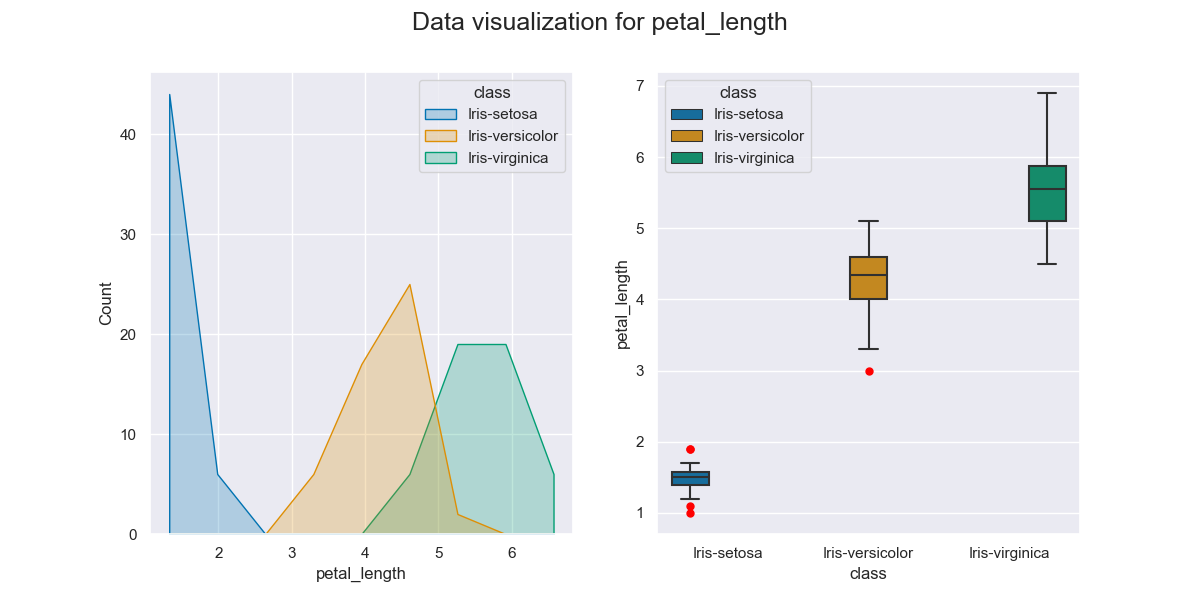

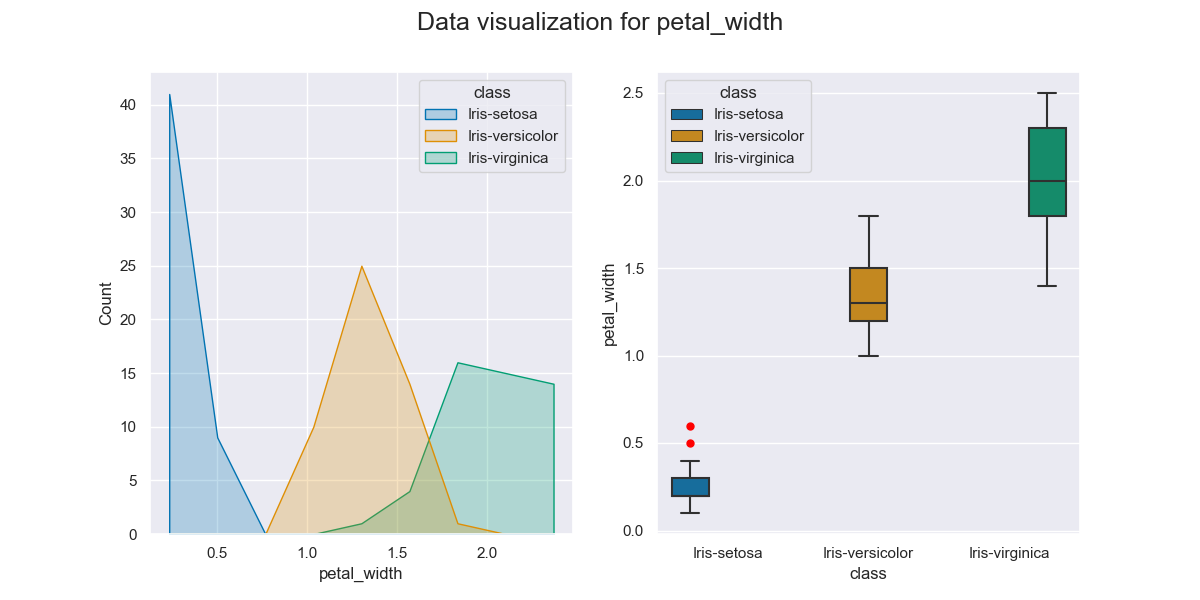

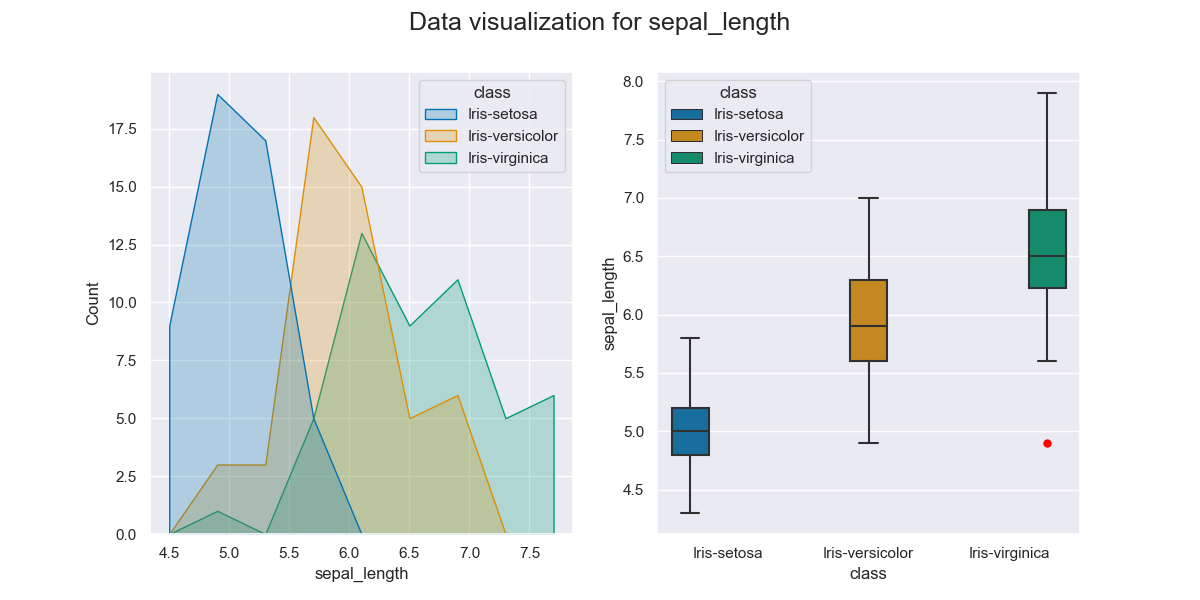

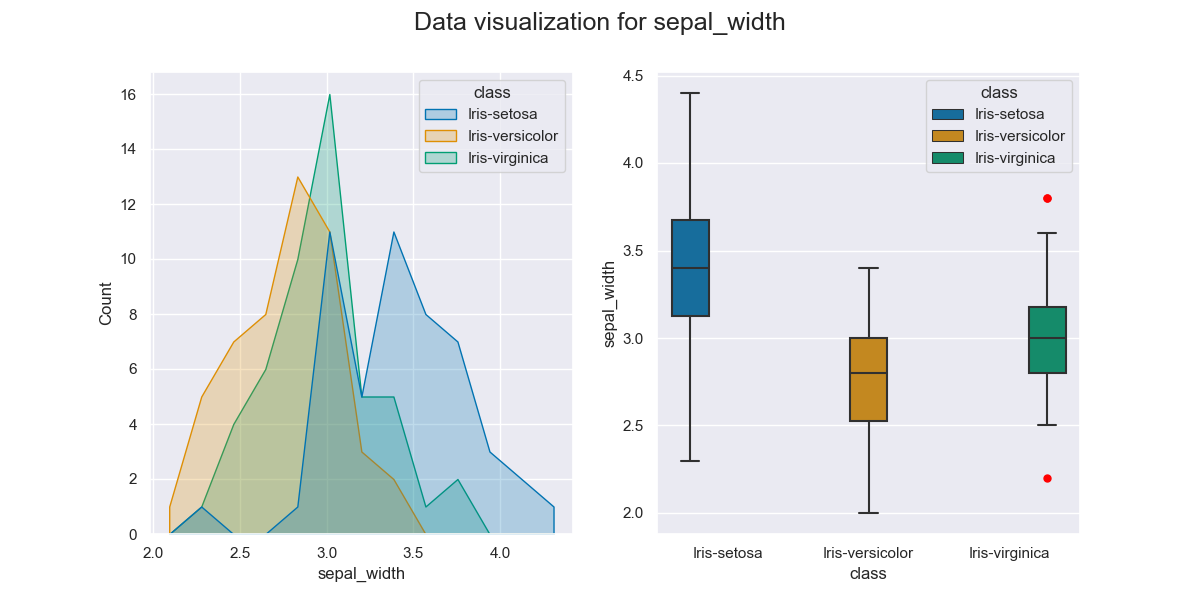

In [68]:
btraits=["petal_length","petal_width","sepal_length","sepal_width"]

# From: https://stackoverflow.com/questions/51784680/how-to-iterate-through-a-folder-of-images-and-print-images-inline-in-jupyter-not

for idx, i in enumerate(btraits,start=2):
    img_path=os.path.join('./outputs/figures/',f'Data checks_{i}.png')
    display(Image(filename=img_path, width=1000, height=600))
    display(HTML(f'<figcaption style="text-align: center; font-size: 18px; margin-top:1px;">Figure {idx}: Data checks for {i}</figcaption>'))

As requested during the assessment, another plot produced in the "analysis.py" file investigates potential relationships between each pair of the flower biological variables for each of the three species (Figure 6). Correlation between each pair of variables tends to be positive, as it is confirmed by quickly displaying correlation matrix plots for each specie (Figure 7-9). In these plots, a value of 1 indicates an strong positive correlation, 0 no linear correlation and -1 a strong negative correlation. Some of this correlation are close to 0, indicating the relationship is close to 0 and probably non-significant. These seems to be more the case for the <i>Iris setosa</i> specie, which really only exhibits a significant positive correlation between sepal length and width.   

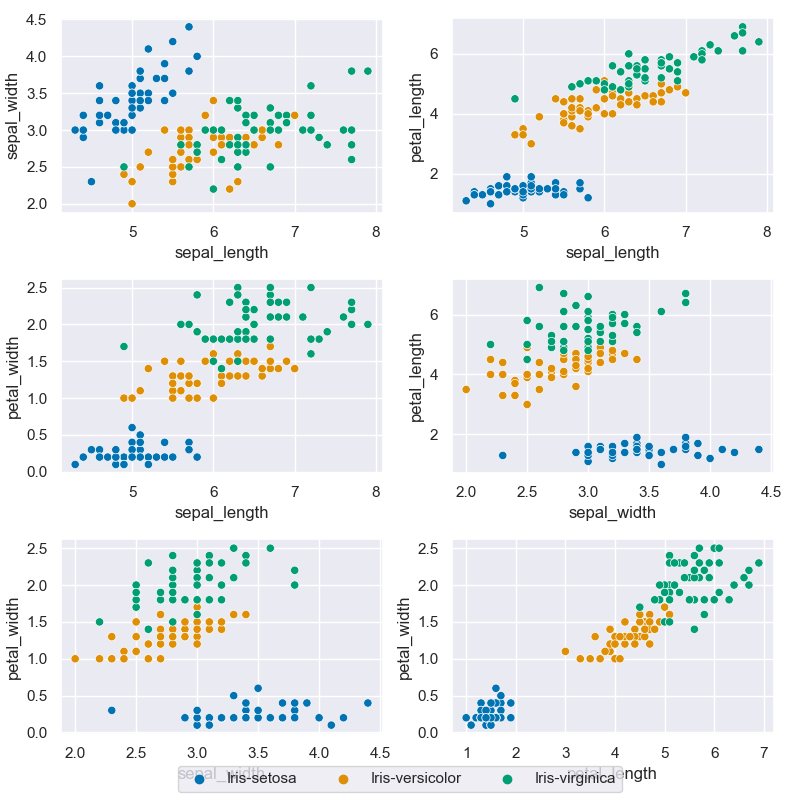

In [69]:
display(Image(filename='./outputs/figures/Scatter pair plots.png', width=1000, height=600))
display(HTML(f'<figcaption style="text-align: center; font-size: 18px; margin-top:1px">Figure 6: Pair scatter plots of the flower biological traits</figcaption>'))

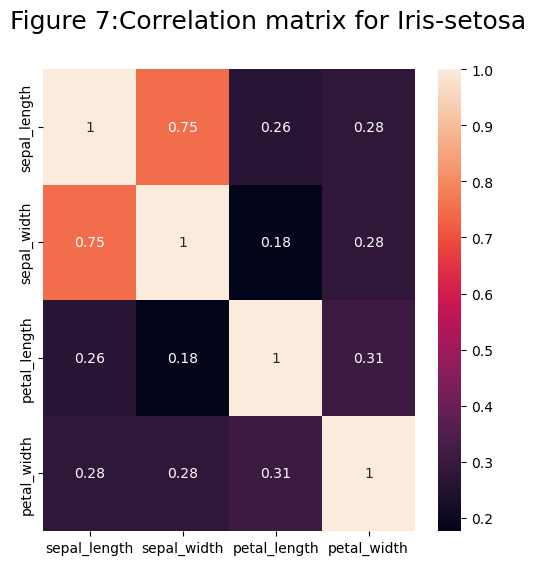

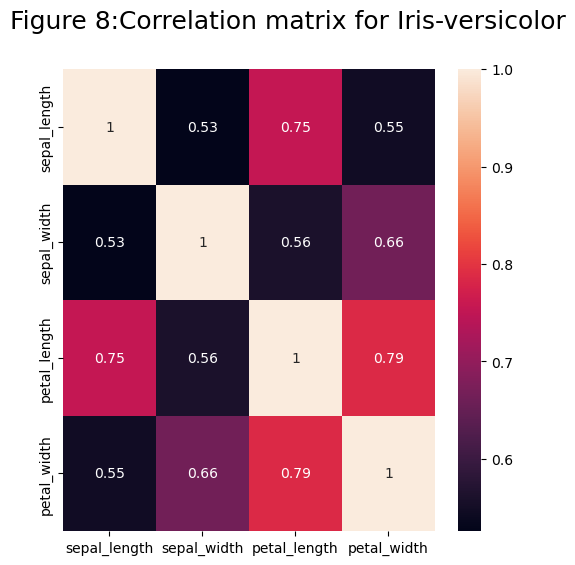

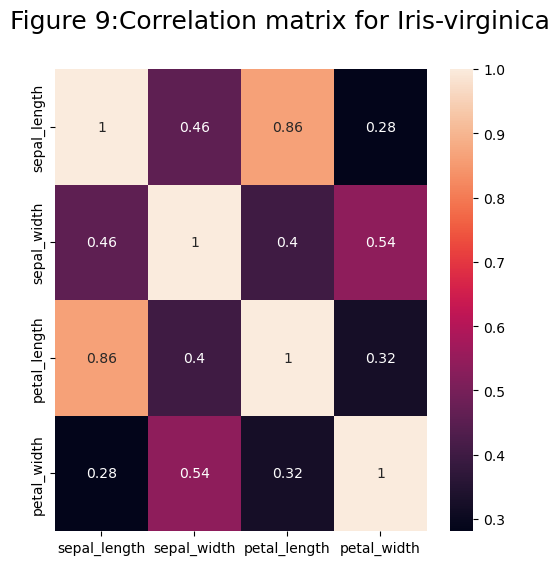

In [70]:
# Correlation matrix plot
sp = dat['class'].unique()

for idx,s in enumerate(sp,start=7): 
    plt.figure(figsize=(6,6))
    tmp = dat[dat['class'] == s]
    corr=tmp.iloc[:,0:4].corr()
    sns.heatmap(corr, annot=True)
    plt.suptitle(f"Figure {idx}:Correlation matrix for {s}",fontsize=18)

# <a id='toc3_'></a>[3. Problem statement](#toc0_)

In the previous section, we have seen that the biological traits in the Iris dataset differ across the three species (more pronouncely in <i>Iris setosa</i>), but also, that there are high positive correlation between some of these biological traits and that this correlations differ across species. 

Given this dataset, I straight away thought it would be very interesting to develop a model that could identify what Iris specie we have in our hands, based on the measurements we take on the field, rather than relying in expert eye to classify the species. Now, as the Iris dataset is widely known, I have not been the first to ask this question, and I found a very clean and nice repository (<a href="https://github.com/Apaulgithub/oibsip_taskno1">here</a>) that tests several modelling frameworks and find the best performing model for this task. In this repository, they found that the best fitting model (by measuring the precision) was a tuned random forest (by "tuned" meaning they cross-validated the model to find the best fitting parameters). 

I will attempt the implementation of a simple random forest model (without cross-validating or fine tuning model parameters) that will classify the different Iris species based on the biological traits in the dataset .

# <a id='toc4_'></a>[4. Random Forest implementation](#toc0_)

Before attempting to implement the Random Forest, we first need to split our data into a training and a testing set. But even before that, we need to define what will be our covariates, and what will be our response variable. Our covariates is the data that we are using to predict our response. In this particular example so, the covariates will be the biological traits of the flowers and the response will be the Iris specie. 

In [71]:
x=dat.drop(columns=['class'], axis=1)
y, levels=dat['class'].factorize() #Transform Iris species to numbers (for plotting later)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3) # the test. size means that 30% of the data will be used for testing the model, and 70% to train the model. 

# We can quickly check that as both x_train and y_train are now 105 rows (70% of 150)
x_train.count()

sepal_length    105
sepal_width     105
petal_length    105
petal_width     105
dtype: int64

Next we implement the model (.fit), and predict Iris species based on the test data subset. 

In [72]:
# Defining the model: 
rf_model=RandomForestClassifier(random_state=0) #random_state=0 means that the results will be reproducible when implementing the model over the same data

#To Fit the model, we train it with our covariate and response train subsets
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [73]:
# And now, we can use the model to predict Iris species based on the covariates from the test subset
y_pred = rf_model.predict(x_test)
y_pred 

array([2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2,
       1], dtype=int64)

A useful way of visualizing and understanding the model performance is to use the so called confusion matrix (Figure 10). This matrix shows how many times one species has been correctly identified, or if it has been incorrectly identified as the other species. In this particular tests the model always correctly identified <i>Iris setosa</i>, but has misidentified, two entries of <i>Iris versicolor</i> as <i>Iris virginica</i> and once viceversa. 

Text(0.5, -0.1, 'Figure 10: Confusion matrix heatmap for the Iris data random forest model')

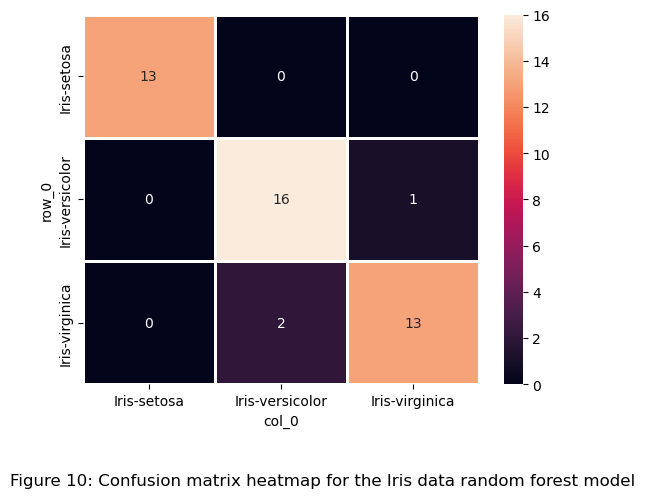

In [74]:
# The labels in this plot are numeric (0,1,2), but in reality, these values represent the Iris species 
# We know however to which levels the numeric values are referring too, so a bit of wrangling allows to change the labels in the plot
cm = confusion_matrix(y_test,y_pred)
cm= pd.crosstab(levels[y_test],levels[y_pred])

sns.heatmap(cm, linewidths=1, annot=True)
plt.figtext(0.5, -0.1, "Figure 10: Confusion matrix heatmap for the Iris data random forest model", wrap=True, horizontalalignment='center', fontsize=12)


A way of measuring the precision of the model, is to know the percentage of times the model has correctly identified the specie. This can be done with the .score function, but to show that I understand what the code is doing, we can check the number of times the y_test is equal to the y_pred, and the resulting percentage would be the same (42/45 = 0.9333) as the output from the .score

In [75]:
results = y_pred == y_test 
print(np.unique(results,return_counts=True))
rf_model.score(x_test,y_test)

(array([False,  True]), array([ 3, 42], dtype=int64))


0.9333333333333333

# <a id='toc5_'></a>[5. Final remarks](#toc0_)

In this notebook we have briefly analyzed the Fisher's Iris dataset using python. I have gone slightly further than what was originally requested in the assessment project description by implementing a simple random forest algorithm, that can predict the Iris specie based on a given set of flower measurements. By no means this is a well-tested and ready to use model, but I wanted to explore further what I could do with python. One particular thing that is interesting from this result, is that the random forest seem to better classify <i>Iris setosa</i> than the other two species. As we saw, the biological traits of <i>Iris setosa</i> are more distinctive that for the other two species, and the model seems to struggle as the other two species are more similar. 

I am familiar with data analytics, and model implementation, but my main coding language is R. This assessment project and the whole course really, has been a great learning curve and beginner guide to Python. I wont be changing from R to Python straight away, as I still feel I need to familiarize myself better with the python language, but so far I am finding the programme very well structured and interesting.   